Introduction: Trend-following trading strategies are based on technical analysis of price-trends of the desired stocks. Simple Moving Average (SMA), Exponential Moving Average (EMA) and Average Directional Moving Average (ADX) are the main inputs for trend-following strategy. In this assignment, an optimal SMA-based crossover strategy for our portfolio of stocks is to be selected. In SMA-based crossover strategy, a buy signal is indicated when a short-term SMA crosses over the long-term SMA. Similarly, a sell signal is indicated when the long-term SMA crosses over the short-term SMA. For the purpose of this assignment, I have selected the following four stocks for portfolio construction: 
(i) Biogen Inc. (BBIA); (ii) NVIDIA Corp (NVDA)(iii) Netflix (NFLX); and (iv) Target Corp (TGT).
This assignment is in three parts, viz., (i) Strategy 1 - Backtesting crossover trading strategies of 50 days and 200 days SMAs and 1 day and 50 days SMAs; (ii) Strategy 2- Backtesting crossover trading strategies of 50 days and 200 days SMAs and 30 days and 180 days SMAs; and (iii) Buy and hold strategy for the given stocks as given in Better_SMA.py script. 

# Strategy 1

Step 1: First we import bt, pandas, numpy and matplotlib packages. We also use %Matplotlib inline in our code to make the plots (graphs) visible in Jupyter notebook as also select ggplot as our graph style. 

In [148]:
# Installing the bt package
! pip install bt

In [149]:
# import essential packages
import bt # Backtesting package
import pandas as pd # Data science fundamentals package
import numpy as np # Scientific computing package
import matplotlib.pyplot as plt # Visual graphics package
%matplotlib inline   

In [150]:
plt.style.use('ggplot')  # plotting style package

Step 2: In the second step, we construct a portfolio of 4 stocks, viz., Biogen, NVIDIA Corp, Netflix and Target Corporation. We import the adjusted closing price data of these stocks from yahoo finance by using bt.get code for the period January 1, 2018 - June 1, 2021. We assign the imported data to 'data'. We also check the first and last five rows of the imported data.

In [151]:
# Importing data of the desired portfolio stocks 
data = bt.get('BIIB, NVDA, NFLX, TGT', start = '2018-1-1', end = '2021-6-1')

In [152]:
# Checking top 5 rows of dataframe
data.head()

,biib,nvda,nflx,tgt
Date,,,,
2018-01-02,334.170013,49.380810,201.070007,61.324657
2018-01-03,339.850006,52.630749,205.050003,60.907539
2018-01-04,339.989990,52.908180,205.630005,59.710598
2018-01-05,342.489990,53.356533,209.990005,60.345345
2018-01-08,329.649994,54.991417,212.050003,60.916611


In [153]:
# Checking bottom 5 rows of dataframe
data.tail()

,biib,nvda,nflx,tgt
Date,,,,
2021-05-25,273.450012,156.394913,501.339996,223.764954
2021-05-26,267.839996,156.917145,502.359985,225.562637
2021-05-27,267.369995,154.798264,503.859985,225.820862
2021-05-28,267.480011,162.359268,502.809998,225.373917
2021-06-01,267.149994,162.559174,499.079987,225.721542


Step 3: We create two trend indicators for the above dataset in the form of a 50 days SMA and a 200 days SMA. SMA (simple moving average) is the rolling 'n' period average of the closing prices of the selected stocks. These SMAs are assigned the names sma_short1 and sma_long1. We merge the data of closing prices of the four stocks, their short SMAs, and long SMAs and plot them for visual presentation.

In [154]:
# Defining 50 days and 200 days SMAs as the short and long SMAs
sma_short1 = data.rolling(50).mean()
sma_long1 = data.rolling(200).mean()

<AxesSubplot:xlabel='Date'>

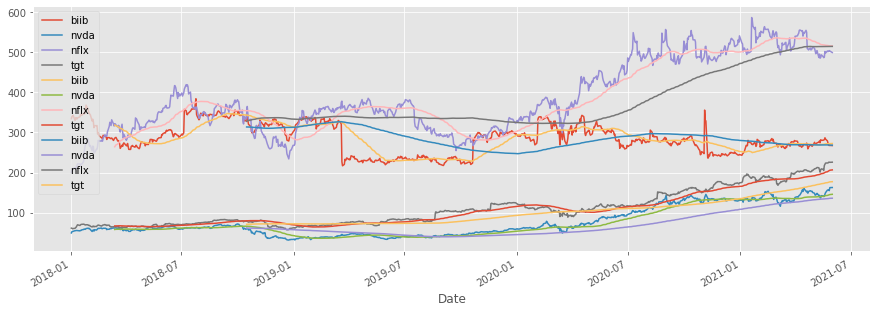

In [155]:
# Merging short SMA,long SMA and closing price dataframes and plotting the dataframe
# plot = bt.merge(data, sma_short1, sma_long1).plot(figsize=(15, 5))
algo_df = bt.merge(data, sma_short1, sma_long1)
algo_df.plot(figsize=(15, 5))

Step 4: We build our first 'trend-following' strategy, MA_cross1, on the premise that the short SMA is more sensitive to the current price changes than the long SMA. Thus, when the short SMA's value increases vis-a-vis long SMA (i.e., when short SMA crosses long SMA from below), there is a signal for bullish trend. First we create the signal dataframe by copying the long SMA. Then we construct the signal 'target_weights'. MA_cross1 strategy is to buy any of these stocks when their short SMA > long SMA and vice-versa. We also intend to keep the weights of all stock equal in the portfolio. Therefore, the trade action is given a weight of 0.25 (one fourth). Security weights in the portfolio and transaction details are also examined and interpreted below.  

In [156]:
# Setting target weights
target_weights1 = sma_long1.copy()
target_weights1[sma_short1 > sma_long1] =  0.25
target_weights1[sma_short1 <= sma_long1] = -0.25

In [157]:
# Defining the crossover strategy between 50 days and 200 days SMAs
MA_cross1 = bt.Strategy('50_200_crossover', [bt.algos.WeighTarget(target_weights1),bt.algos.Rebalance()])

In [158]:
# Backtesting the strategy
t1 = bt.Backtest(MA_cross1, data)
res_MA1 = bt.run(t1) # Showing result of the backtest
res_MA1.display()

Stat                 50_200_crossover
-------------------  ------------------
Start                2018-01-01
End                  2021-06-01
Risk-free rate       0.00%

Total Return         0.59%
Daily Sharpe         0.13
Daily Sortino        0.19
CAGR                 0.17%
Max Drawdown         -45.34%
Calmar Ratio         0.00

MTD                  -0.15%
3m                   9.32%
6m                   11.20%
YTD                  10.47%
1Y                   41.56%
3Y (ann.)            0.20%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  0.17%

Daily Sharpe         0.13
Daily Sortino        0.19
Daily Mean (ann.)    3.20%
Daily Vol (ann.)     24.50%
Daily Skew           -0.70
Daily Kurt           13.06
Best Day             10.15%
Worst Day            -11.10%

Monthly Sharpe       0.10
Monthly Sortino      0.15
Monthly Mean (ann.)  1.87%
Monthly Vol (ann.)   18.47%
Monthly Skew         -0.50
Monthly Kurt         0.98
Best Month           12.26%
Worst Month          

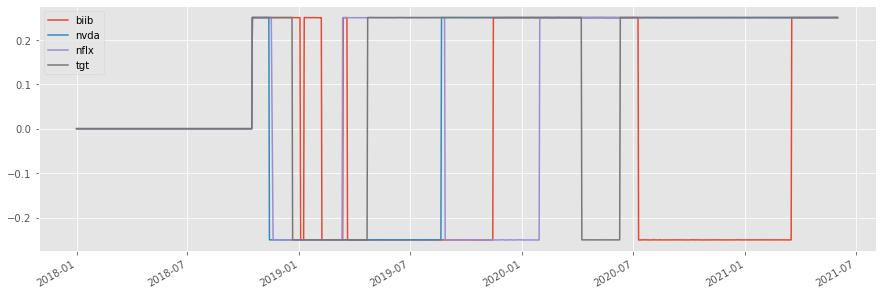

In [159]:
# Plotting the weights of stocks in the portfolio during strategy trading period
res_MA1.plot_security_weights() 

Interpretation of the Graph: This graph shows that the trading in the portfolio has started on October 16, 2018 (confirmed from transaction details below), probably when the first 200 days SMA is avaialble and a crossover takes place in long and short SMAs of all the four stocks for a buy trade. The weights of the stocks are always 25% of the portfolio value. The last trade took place on June 1, 2021 with 'Buy' for Netflix and 'Sell' for the remaining three stocks.

In [160]:
# Showing transactions of the trading strategy
res_MA1.get_transactions()

price  quantity
Date       Security                      
2018-10-16 biib      338.609985     738.0
           nflx      346.399994     721.0
           nvda       61.003197    4098.0
           tgt        79.747116    3134.0
2018-10-17 biib      338.230011       5.0
...                         ...       ...
2021-05-28 nvda      162.359268     -57.0
           tgt       225.373917      15.0
2021-06-01 nflx      499.079987       3.0
           nvda      162.559174      -5.0
           tgt       225.721542      -3.0

[2552 rows x 2 columns]

In the next step, we create a sub-strategy of crossover between the price of the stocks and their 50 days simple moving average. As price is akin to 1 day SMA, it will be more sensitive than the 50 day SMA. Thus, price crossing the 50 day SMA from below will indicate 'Buy' signal and vice-versa. The comaprative plot and result for this and 'short and long SMA crossover' strategies are depicted below.  

In [161]:
# Creating signal for crossover strategy between 1 day (closing prices) and 50 days SMAs 
signal1 = data > sma_short1
bt.algos.SelectWhere(signal1, include_no_data=False) # algorithm

In [162]:
# Defining the trading strategy for 1 day and 50 days SMAs
s2 = bt.Strategy('daily_50_crossover', [bt.algos.SelectWhere(signal1),bt.algos.WeighEqually(),bt.algos.Rebalance()])

In [163]:
# Backtesting the strategy
t2 = bt.Backtest(s2, data)

In [164]:
# Getting result of the strategy
res1 = bt.run(t2)
res1.display()

Stat                 daily_50_crossover
-------------------  --------------------
Start                2018-01-01
End                  2021-06-01
Risk-free rate       0.00%

Total Return         19.34%
Daily Sharpe         0.33
Daily Sortino        0.51
CAGR                 5.32%
Max Drawdown         -33.53%
Calmar Ratio         0.16

MTD                  0.14%
3m                   1.45%
6m                   -3.72%
YTD                  -3.48%
1Y                   6.04%
3Y (ann.)            9.46%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  5.32%

Daily Sharpe         0.33
Daily Sortino        0.51
Daily Mean (ann.)    8.70%
Daily Vol (ann.)     26.47%
Daily Skew           -0.30
Daily Kurt           6.97
Best Day             11.21%
Worst Day            -11.81%

Monthly Sharpe       0.34
Monthly Sortino      0.56
Monthly Mean (ann.)  7.88%
Monthly Vol (ann.)   23.31%
Monthly Skew         -0.41
Monthly Kurt         -0.25
Best Month           13.66%
Worst Month       

<AxesSubplot:title={'center':'Equity Progression'}>

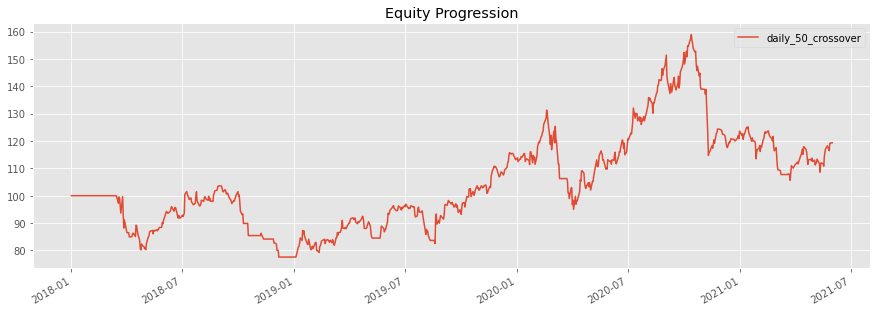

In [165]:
# Plotting the result
res1.plot()

Interpretation of the Graph: The graph clearly shows that the 'price-short-term SMA crossover' strategy (above50SMA) has better overall return (both CAGR and Total Return) than the 'SMAs crossover' strategy (MA_cross1). While both the strtategies have given negative returns in the begining, the above50SMA has turned positive around September 2019. Both the strategies have shown sharp volatilities. Risk-adjusted returns in terms of Sharpe, Sortino and Calmer ratios are marginal and less than 1 in cases of both the strategies. Therefore, none of the strategies can be considered as superior.

In [166]:
# Displaying the result
res1.display()

Stat                 daily_50_crossover
-------------------  --------------------
Start                2018-01-01
End                  2021-06-01
Risk-free rate       0.00%

Total Return         19.34%
Daily Sharpe         0.33
Daily Sortino        0.51
CAGR                 5.32%
Max Drawdown         -33.53%
Calmar Ratio         0.16

MTD                  0.14%
3m                   1.45%
6m                   -3.72%
YTD                  -3.48%
1Y                   6.04%
3Y (ann.)            9.46%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  5.32%

Daily Sharpe         0.33
Daily Sortino        0.51
Daily Mean (ann.)    8.70%
Daily Vol (ann.)     26.47%
Daily Skew           -0.30
Daily Kurt           6.97
Best Day             11.21%
Worst Day            -11.81%

Monthly Sharpe       0.34
Monthly Sortino      0.56
Monthly Mean (ann.)  7.88%
Monthly Vol (ann.)   23.31%
Monthly Skew         -0.41
Monthly Kurt         -0.25
Best Month           13.66%
Worst Month       

# Strategy 2

Under this strategy, we try to find a better combination of long and short SMAs over the benchmark 50 days and 200 days combination for the SMA crossover strategy. For this, we define the Strategy Optimization Function. The inputs needed for this function are the adjusted-closing price data of the target stocks for the period January 1, 2018 to June 1, 2021, long-term and short-term SMA definitions and construction of the signal for trading. Based on these inputs, we define the strategy and create the backtest using the 'bt' package.

In [167]:
# Defining the crossover trading strategy function 
def ma_crossover(name, n_long, n_short, tickers = 'biib, nvda, nflx, tgt',  start='2018-01-01', end = '2021-6-1'):
  
# Get the data 

 data = bt.get('biib, nvda, nflx, tgt', start='2018-01-01', end = '2021-6-1')
    
# Define SMAs    
 sma_long = data.rolling(n_long).mean()
 sma_short = data.rolling(n_short).mean()

# create the signal dataframe

 target_weights = sma_long.copy()

# construct the signal

 target_weights[sma_short > sma_long] =  0.25
 target_weights[sma_short <= sma_long] = -0.25

# create strategy

 MA_Strategy = bt.Strategy(name, [bt.algos.WeighTarget(target_weights),bt.algos.Rebalance()])

# now we create the backtest
 return bt.Backtest(MA_Strategy, data)

In the next step, the Benchmark Strategy and the Best Strategy are defined. Benchmark Strategy is defined as the crossover strategy of 50 days and 200 days SMAs, while another Crossover Strategy is obtained from 30 days and 180 days SMAs. The comparative result of both is plotted and explained in the following cells.

In [168]:
# Setting 50 days and 200 days SMAs crossover strategy as our benchmark strategy
Benchmark_Strategy = ma_crossover(name = '50-200_Strategy', n_long = 200, n_short = 50)

In [169]:
# Defining the 30 days and 180 days SMAs for a crossover strategy
t3 = ma_crossover(name = '30-180_Strategy', n_long = 180, n_short = 30)


In [170]:
# Getting and displaying the result of 30-180 days SMAs crossover strategy
res_best = bt.run(t3)
res_best.display()

Stat                 30-180_Strategy
-------------------  -----------------
Start                2018-01-01
End                  2021-06-01
Risk-free rate       0.00%

Total Return         19.88%
Daily Sharpe         0.34
Daily Sortino        0.50
CAGR                 5.46%
Max Drawdown         -31.36%
Calmar Ratio         0.17

MTD                  0.22%
3m                   5.88%
6m                   7.21%
YTD                  6.51%
1Y                   32.87%
3Y (ann.)            6.23%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  5.46%

Daily Sharpe         0.34
Daily Sortino        0.50
Daily Mean (ann.)    8.38%
Daily Vol (ann.)     24.65%
Daily Skew           -0.60
Daily Kurt           11.75
Best Day             10.15%
Worst Day            -11.11%

Monthly Sharpe       0.39
Monthly Sortino      0.58
Monthly Mean (ann.)  6.91%
Monthly Vol (ann.)   17.80%
Monthly Skew         -0.88
Monthly Kurt         2.81
Best Month           12.25%
Worst Month          -15.

In [171]:
# Running the Benchmark strategy and Best crossover strategy for comparative result
result = bt.run(Benchmark_Strategy, t3)

<AxesSubplot:title={'center':'Equity Progression'}>

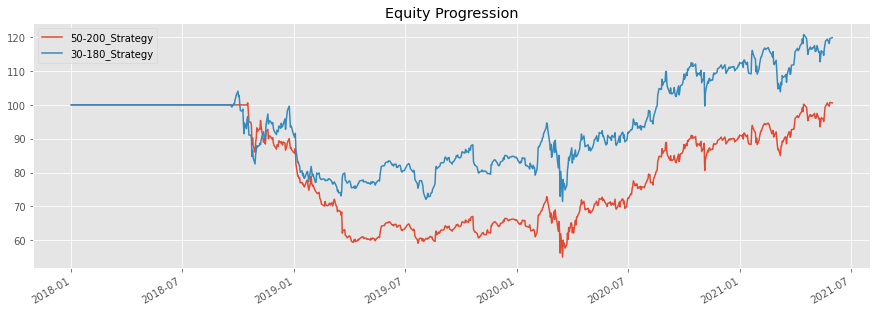

In [172]:
# Plotting the result
result.plot()

Return Analysis: The 30-180 days combination of SMAs gives much superior return (around 20% total return and 5.44% of CAGR) than the 50-200 days combination (0.55% total return and 0.16% CAGR). However, the Sharpe, Sortino and Calmer ratios of both the strategies are less than 1, which shows only marginally better risk-adjusted returns. As seen from the graph above, tradings in both the strategies had started around October 2018, when the first long-term SMAs are available and the crossover of short-term and long-term SMAs took place. Both the strategies had given negative returns since the first trading, but the 30-180 days strategy turned positive after August 2020. The 50-200 days strategy has turned positive only recently. Due to this lower base effect, its 1 year and Year-to-date (YTD) returns are higher at 41.52% and 10.45% respectively than those of the 30-180 days strategy (32.81% and 6.49%).
Risk Analysis: Both the strategies had been volatile as seen from the graph. The downside risk is also prominent in them. This is also confirmed by a negative skewness (-0.51) for 50-200 days strategy and marginally positive skewness (0.89) for the 30-180 days strategy. Respective maximum drawdowns of -45.34% and -31.36% are very high for these strategies. Average drawdown days of the '50-200 days' strategy is exceptionally high at 476.50 days.

In [173]:
# Displaying the result
result.display()

Stat                 50-200_Strategy    30-180_Strategy
-------------------  -----------------  -----------------
Start                2018-01-01         2018-01-01
End                  2021-06-01         2021-06-01
Risk-free rate       0.00%              0.00%

Total Return         0.59%              19.88%
Daily Sharpe         0.13               0.34
Daily Sortino        0.19               0.50
CAGR                 0.17%              5.46%
Max Drawdown         -45.34%            -31.36%
Calmar Ratio         0.00               0.17

MTD                  -0.15%             0.22%
3m                   9.32%              5.88%
6m                   11.20%             7.21%
YTD                  10.47%             6.51%
1Y                   41.56%             32.87%
3Y (ann.)            0.20%              6.23%
5Y (ann.)            -                  -
10Y (ann.)           -                  -
Since Incep. (ann.)  0.17%              5.46%

Daily Sharpe         0.13               0.34
Daily S

# Long only position 

The long only strategy involves composition of a portfolio of the four stocks in equal value and holding the same till the end of the investment period. Codes for this position are given below.

In [174]:
# Defining 'Buy and Hold' as the long only strategy
long_only = bt.Strategy('longOnly', [bt.algos.RunOnce(), bt.algos.SelectAll(), bt.algos.WeighEqually(), bt.algos.Rebalance()])

In [175]:
# Backtesting the long only strategy
t4 = bt.Backtest(long_only, data)

C:\Users\RBI\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\RBI\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


<AxesSubplot:title={'center':'Equity Progression'}>

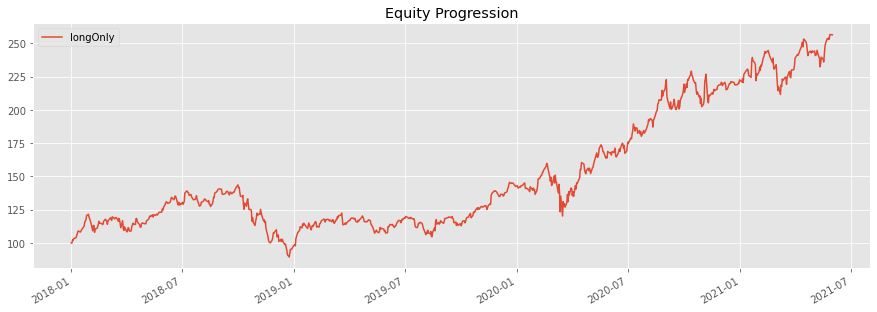

In [176]:
# Getting and plotting the result of backtest
res_longonly = bt.run(t4)
res_longonly.plot()

In [177]:
# Getting the transactions of Buy and hold strategy
res_longonly.get_transactions()

price  quantity
Date       Security                      
2018-01-02 biib      334.170013     748.0
           nflx      201.070007    1243.0
           nvda       49.380810    5062.0
           tgt        61.324657    4076.0

The Long Only strategy has given a very high total return of 156.33% and a CAGR of 31.75% over the investment horizon of and three and half years. This is superior to all the trend-followinfg strategies examined above. The Sharpe and Shortino ratios are also more than 1, implying a superior risk-adjusted return under passive approach. 

In [178]:
# Displaying the parameters result of Buy and Hold strategy 
res_longonly.display()

Stat                 longOnly
-------------------  ----------
Start                2018-01-01
End                  2021-06-01
Risk-free rate       0.00%

Total Return         156.33%
Daily Sharpe         1.07
Daily Sortino        1.72
CAGR                 31.75%
Max Drawdown         -37.76%
Calmar Ratio         0.84

MTD                  -0.10%
3m                   9.54%
6m                   16.19%
YTD                  15.18%
1Y                   52.93%
3Y (ann.)            26.47%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  31.75%

Daily Sharpe         1.07
Daily Sortino        1.72
Daily Mean (ann.)    32.18%
Daily Vol (ann.)     30.12%
Daily Skew           -0.36
Daily Kurt           4.73
Best Day             9.54%
Worst Day            -11.02%

Monthly Sharpe       1.09
Monthly Sortino      2.14
Monthly Mean (ann.)  25.49%
Monthly Vol (ann.)   23.30%
Monthly Skew         -0.23
Monthly Kurt         0.54
Best Month           16.40%
Worst Month          -16.39%

Ye

In [179]:
comp_res = bt.run(t1, t2, t3, t4)

C:\Users\RBI\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [180]:
comp_res.display()

Stat                 50_200_crossover    daily_50_crossover    30-180_Strategy    longOnly
-------------------  ------------------  --------------------  -----------------  ----------
Start                2018-01-01          2018-01-01            2018-01-01         2018-01-01
End                  2021-06-01          2021-06-01            2021-06-01         2021-06-01
Risk-free rate       0.00%               0.00%                 0.00%              0.00%

Total Return         0.59%               19.34%                19.88%             156.33%
Daily Sharpe         0.13                0.33                  0.34               1.07
Daily Sortino        0.19                0.51                  0.50               1.72
CAGR                 0.17%               5.32%                 5.46%              31.75%
Max Drawdown         -45.34%             -33.53%               -31.36%            -37.76%
Calmar Ratio         0.00                0.16                  0.17               0.84

MTD       

<b>Conclusion:</b> Long only strategy is found to be the best trading strategy for the given portfolio and investment period.